In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import os
import fancyimpute
from fancyimpute import KNN 
from impyute.imputation.cs import mice
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.model_selection import cross_val_score


Using TensorFlow backend.


In [2]:
#os.getcwd()
os.chdir(r"C:\Users\ELdrago\Desktop\Edwisor\Projects\Employee Absenteeism\Python_Code")
print(os.listdir("../Python_Code"))

['.ipynb_checkpoints', 'Absenteeism_at_work_Project.xls', 'cleaned_data.csv', 'correlation_plot.png', 'dataframe_head.png', 'missing_perc.csv', 'missing_values.png', 'missing_values_categorical.png', 'missing_values_continuous.png', 'Missing_value_perc.csv', 'mytable.png', 'Output_files', 'Project_Employee_Absenteeism-Main.ipynb', 'Project_Employee_Absenteeism.ipynb', 'Project_Employee_Absenteeism_Submission.ipynb']


In [3]:
# load the data
df=pd.read_excel("Absenteeism_at_work_Project.xls")
dataset=df.copy()
dataset.shape
# saving target variable name for future usage
target_var='Absenteeism time in hours'

<h1 align=center> Exploratory Data Analysis </h1>


In [4]:
dataset.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [5]:
dataset.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [6]:
dataset.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [7]:
# get the structure of the data
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null float64
Month of absence                   739 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social drinker                     737 non-null float64
Social smoker                      736 non-null float64
Pet  

In [8]:
dataset.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,...,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,...,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,...,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [9]:
#changing datatypes of some variables
dataset["ID"]=dataset["ID"].astype("object")
dataset["Reason for absence"]=dataset["Reason for absence"].astype("object")
dataset["Month of absence"]=dataset["Month of absence"].astype("object")
dataset["Day of the week"]=dataset["Day of the week"].astype("object")
dataset["Seasons"]=dataset["Seasons"].astype("object")
dataset["Education"]=dataset["Education"].astype("object")
dataset["Social drinker"]=dataset["Social drinker"].astype("object")
dataset["Social smoker"]=dataset["Social smoker"].astype("object")
dataset["Disciplinary failure"]=dataset["Disciplinary failure"].astype("object")
dataset["Pet"]=dataset["Pet"].astype("object")
dataset["Son"]=dataset["Son"].astype("object")

In [10]:
# separating continuous and categorical variables
categorical_data = dataset.select_dtypes(include=['object']).copy()
continuous_data = dataset.select_dtypes(include=['int64','float64']).copy()
cat_vars=categorical_data.columns
cont_vars=continuous_data.columns
dataset.describe(include=['object', 'bool'])

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet
count,740,737.0,739.0,740,740,734.0,730.0,734.0,737.0,736.0,738.0
unique,36,28.0,13.0,5,4,2.0,4.0,5.0,2.0,2.0,6.0
top,3,23.0,3.0,2,4,0.0,1.0,0.0,1.0,0.0,0.0
freq,113,149.0,87.0,161,195,695.0,601.0,295.0,418.0,682.0,459.0


### Barplots of categorical variables

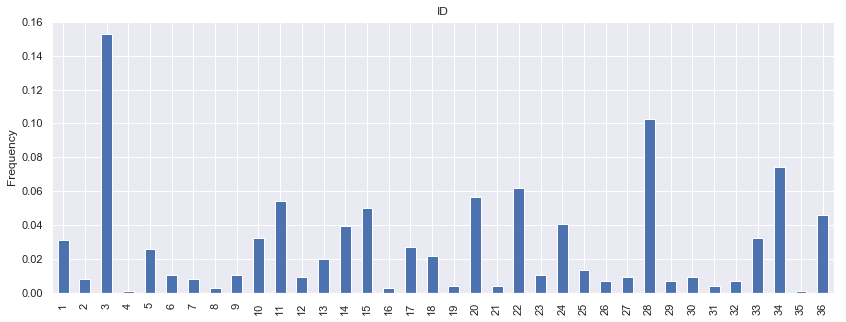

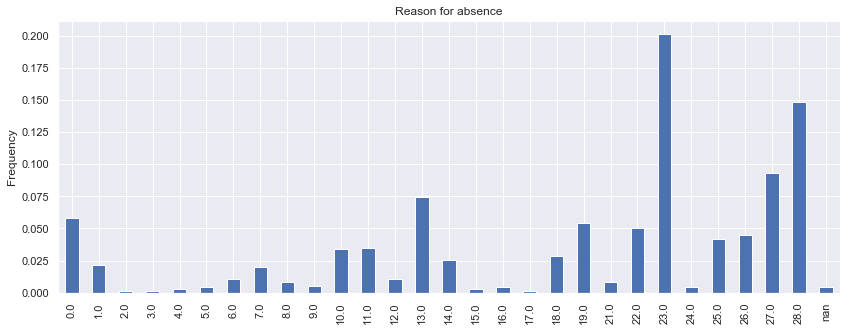

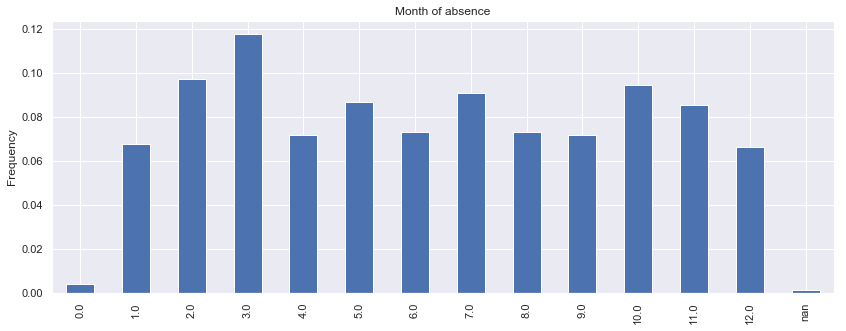

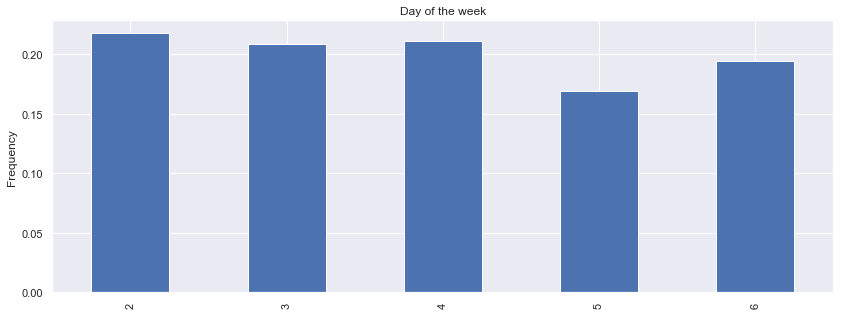

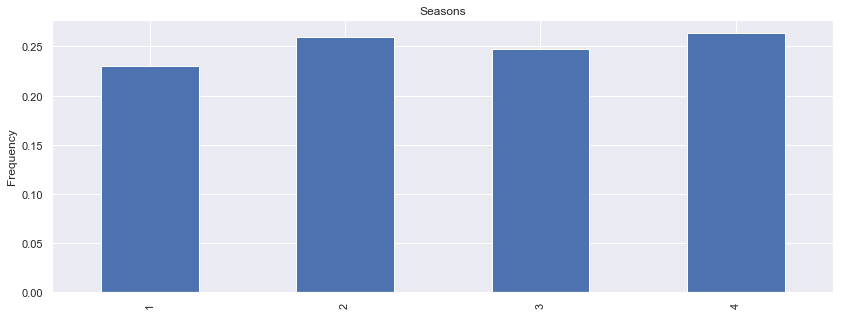

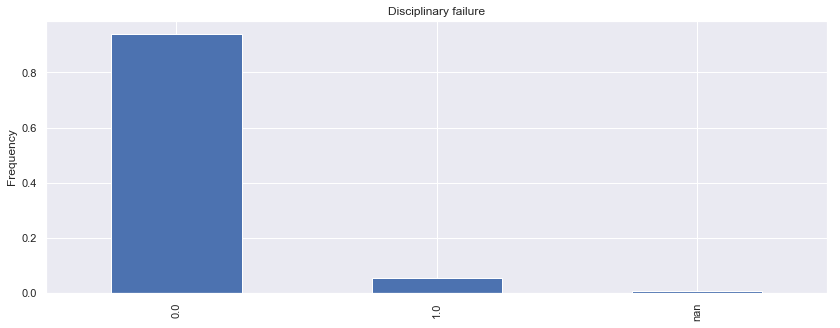

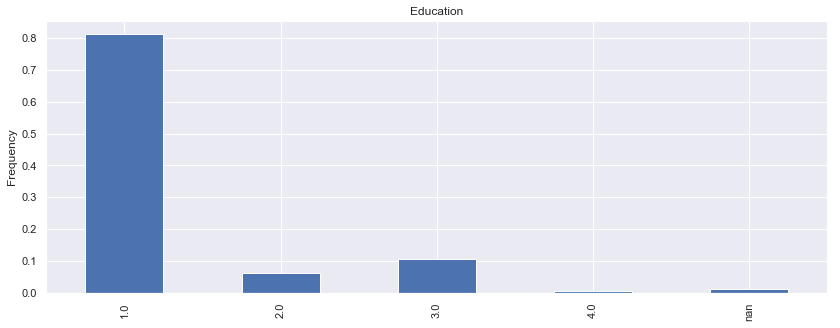

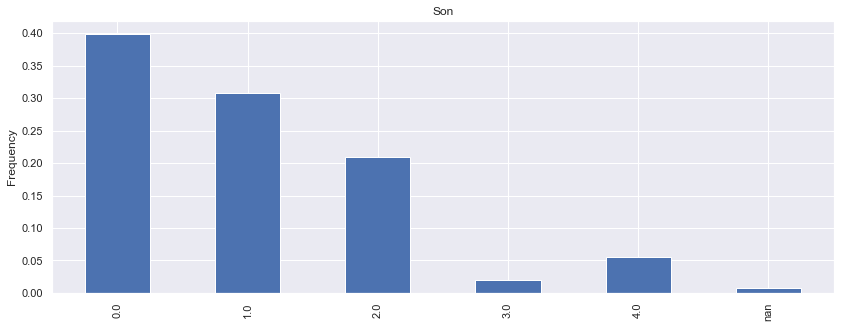

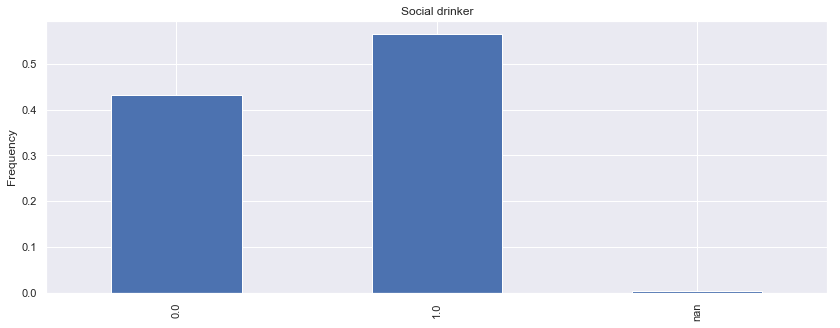

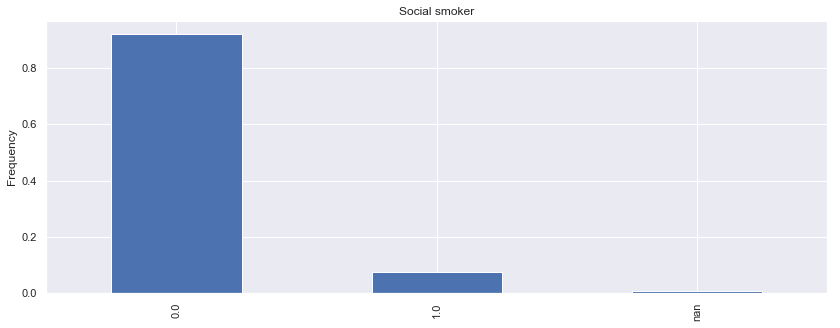

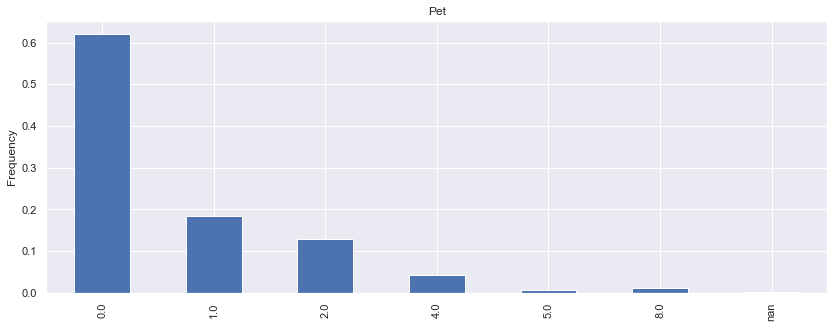

In [11]:
for name in cat_vars:
    plt.figure(figsize=(14,5))
    dataset[name].value_counts(dropna=False, normalize=True).sort_index().plot.bar()
    plt.ylabel("Frequency")
    plt.title(name)
    plt.show()

### Distribution plots of continuous variables

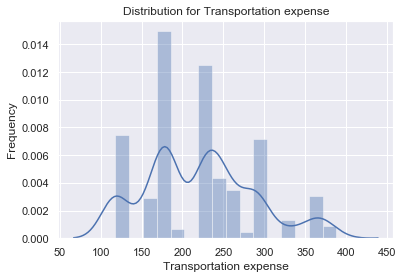

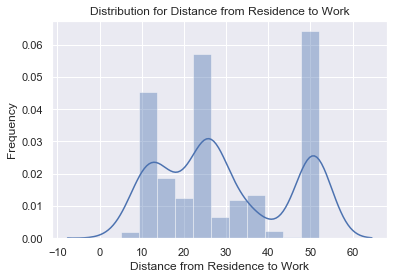

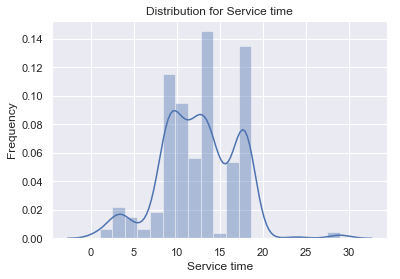

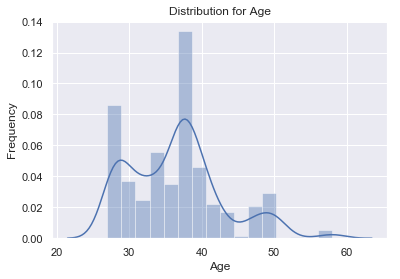

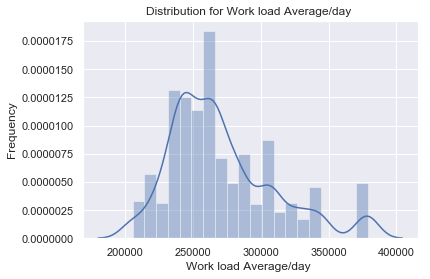

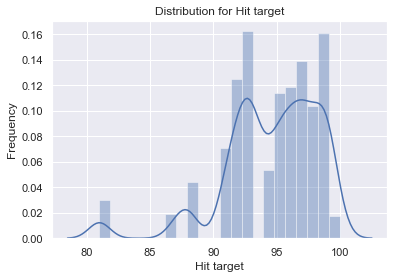

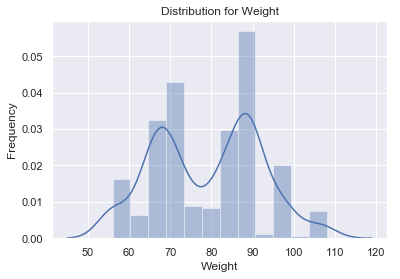

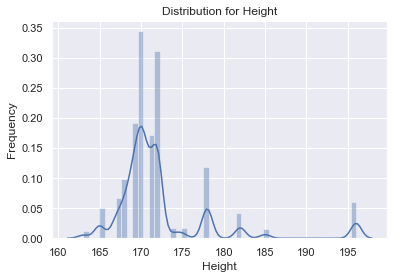

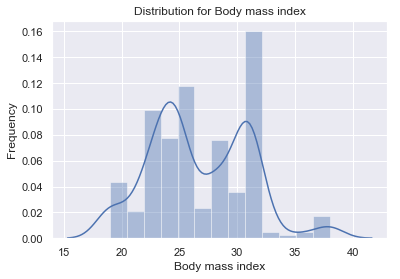

In [12]:
for i in cont_vars:
    if i ==target_var:
        continue
    sns.distplot(dataset[i].dropna(),bins = 'auto')
    plt.title("Distribution for "+str(i))
    plt.ylabel("Frequency")
    plt.show()

In [13]:
dataset_groupby_ID=dataset.groupby(by=["ID"])

In [14]:
for i in sorted(list(dataset["ID"].unique())):
     print(i, dataset_groupby_ID['Distance from Residence to Work'].get_group(i).unique(), sep=',')

1,[11.]
2,[29.]
3,[51.]
4,[14.]
5,[20.]
6,[29.]
7,[5.]
8,[35.]
9,[14.]
10,[52.]
11,[36.]
12,[51.]
13,[17.]
14,[12.]
15,[31.]
16,[15.]
17,[22.]
18,[16.]
19,[50.]
20,[50.]
21,[11.]
22,[nan 26.]
23,[49.]
24,[25.]
25,[16.]
26,[26.]
27,[42.]
28,[26. nan]
29,[26. 15.]
30,[27.]
31,[15.]
32,[48.]
33,[25.]
34,[10. nan]
35,[45.]
36,[13.]


<h1 align=center> Missing Value Analysis </h1>

In [15]:
def show_missing_values(dataset):
    # checking missing values
    missing_values=pd.DataFrame(dataset.isnull().sum().sort_values(ascending= False))
    missing_values
    #reseting index
    missing_values=missing_values.reset_index()
    missing_values
    #renaming the column names of the dataframes
    missing_values= missing_values.rename(columns={'index':'Variables',0:'missing_percentage'})
    missing_values
    #calcualting % of missing values
    missing_values['missing_percentage']=(missing_values['missing_percentage']/len(dataset))*100
    missing_values.to_csv("Missing_value_perc.csv", index = False)
    #plotting 
    plt.figure(figsize=(20,10))
    plt.tick_params(axis='both', which='minor', labelsize=12)
    index=np.arange(len(missing_values.Variables))
    plt.bar(missing_values.Variables,missing_values.missing_percentage)
    plt.title("Missing percentages in each variables")
    plt.ylabel("Percentages")
    plt.xticks(index,missing_values.Variables, fontsize=12, rotation=90)
    
    #print(missing_values)
    return missing_values

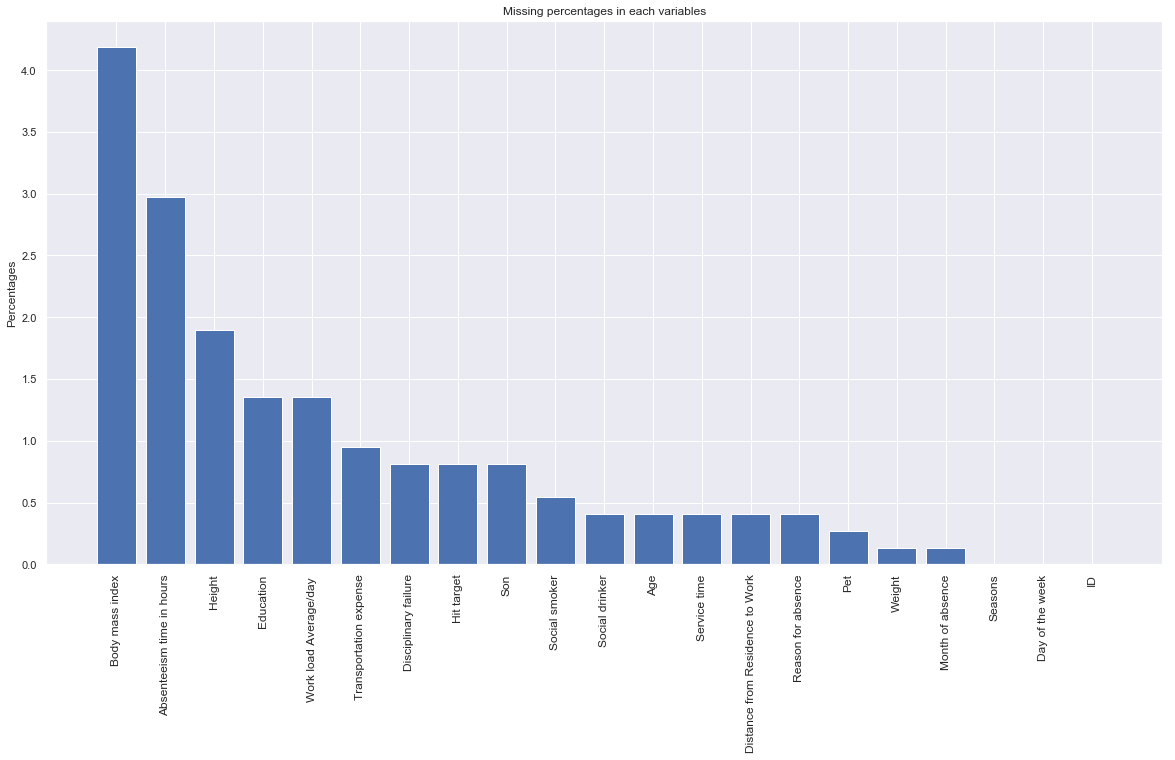

In [16]:
show_missing_values(dataset)
plt.savefig("missing_values.png")

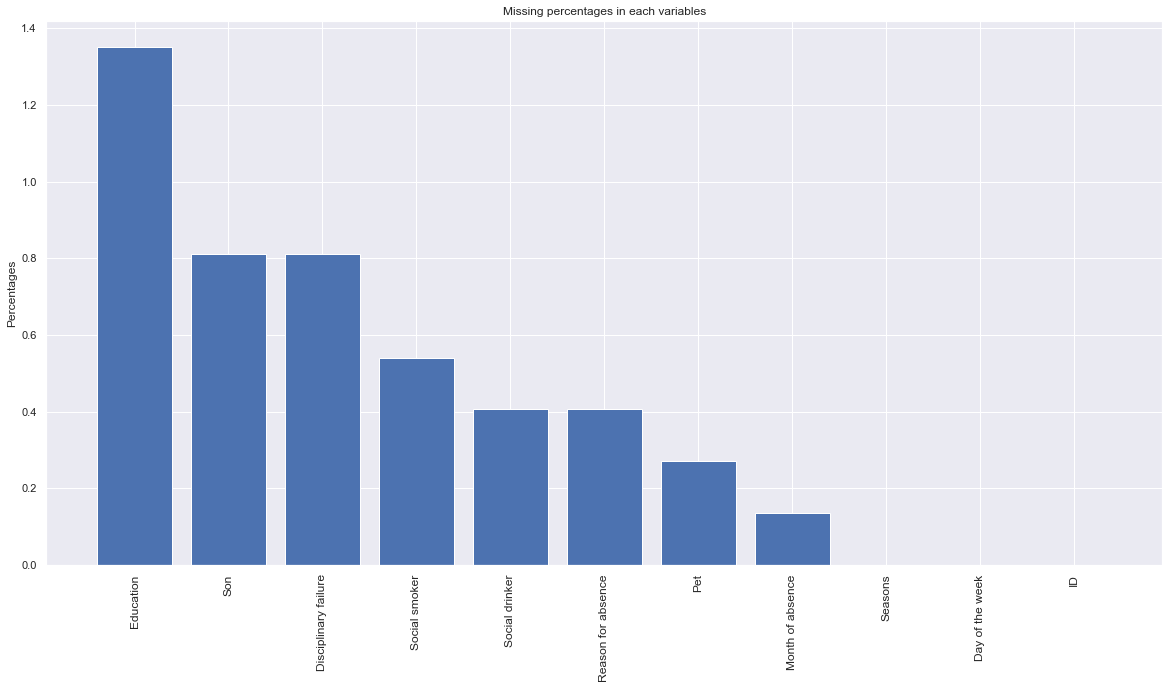

In [17]:
# missing values in categorical data
show_missing_values(categorical_data)
plt.savefig("missing_values_categorical.png")

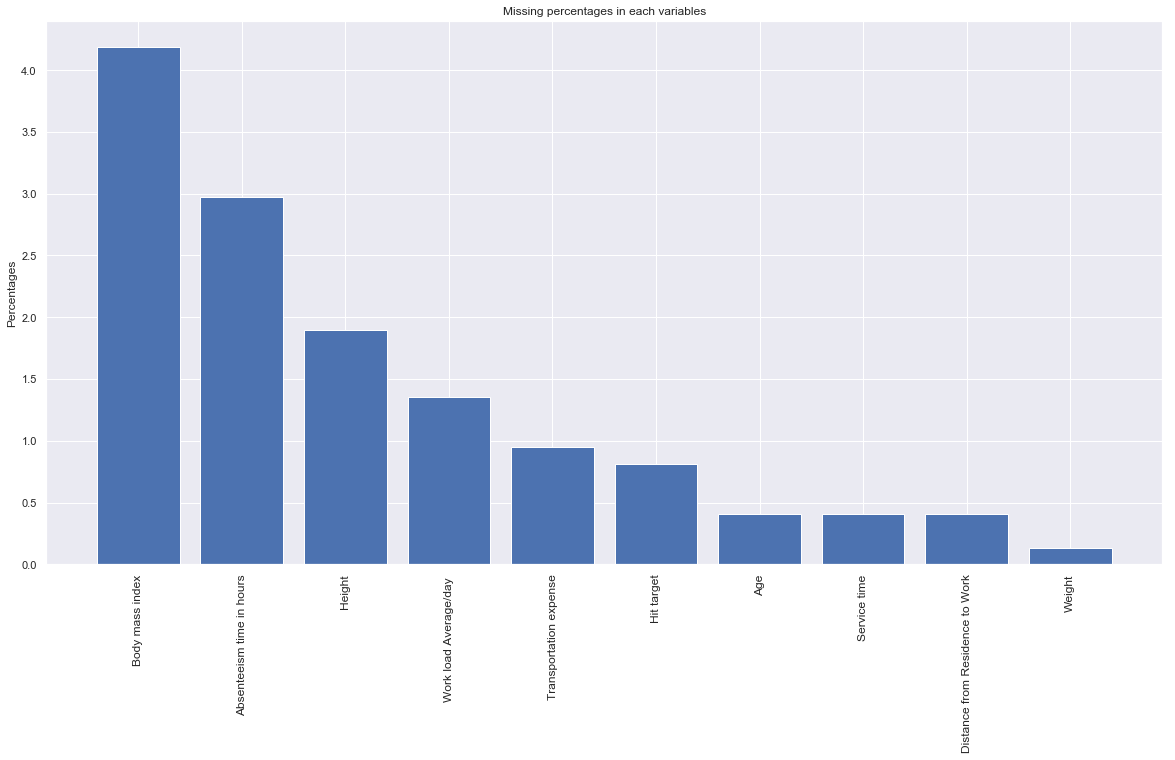

In [18]:
# missing values in continuous data
show_missing_values(continuous_data)
plt.savefig("missing_values_continuous.png")

## Imputation of missing values


In [19]:
#dataset=df.copy()
# Droping observation in which "Absenteeism time in hours" has missing value
dataset = dataset.drop(df[df[target_var].isnull()].index, axis=0)

#sorting the dataset by employee ID
dataset=(dataset.sort_values(by="ID")).reset_index().drop(columns='index')
dataset.shape

(718, 21)

In [20]:
dataset['Transportation expense'].iloc[70]


179.0

In [21]:
# creating a NaN value for testing purpose
dataset['Transportation expense'].iloc[70]=np.nan

C:\Users\ELdrago\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [22]:
dataset['Transportation expense'].iloc[70]

nan


<h3>Missing Value imputation </h3>

 * Original Value= 179
 * Mean Imputation =>221
 * Median Imputation =>225
 * KNN imputation with k=5=> 181
 * mice imputation =>197
   

In [23]:
#imputation with mean of the variable
#dataset['Transportation expense']=dataset['Transportation expense'].fillna(dataset['Transportation expense'].mean())
#dataset['Transportation expense'].iloc[70]

In [24]:
#imputation with median of the variable
#dataset['Transportation expense']=dataset['Transportation expense'].fillna(dataset['Transportation expense'].median())
#dataset['Transportation expense'].iloc[70]

In [25]:
#KNN imputaion of the variable
dataset=pd.DataFrame(KNN(k=5).fit_transform(dataset),columns=dataset.columns)
print(dataset['Transportation expense'].iloc[70])
dataset.isna().sum()

Imputing row 1/718 with 0 missing, elapsed time: 0.683
Imputing row 101/718 with 0 missing, elapsed time: 0.738
Imputing row 201/718 with 0 missing, elapsed time: 0.741
Imputing row 301/718 with 1 missing, elapsed time: 0.745
Imputing row 401/718 with 0 missing, elapsed time: 0.748
Imputing row 501/718 with 0 missing, elapsed time: 0.751
Imputing row 601/718 with 0 missing, elapsed time: 0.754
Imputing row 701/718 with 0 missing, elapsed time: 0.758
180.83066433660588


ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [26]:
# Multiple Imputation 
#df2=df.sort_values(by="ID").reset_index().drop(columns='index').copy()
# make sure that all the variables in the dataset are of type 'float64'
#df2['Transportation expense'].iloc[70]=np.nan
#from impyute.imputation.cs import mice
# start the MICE training
#imputed_training=mice(df2.values)
#keys=list(np.arange(21))
#values=list(dataset.columns)
#new_dict=dict(zip(keys,values))
#df2=pd.DataFrame(imputed_training).rename(columns=new_dict)
#print(df2['Transportation expense'].iloc[70])
#df2.isna().sum()

In [27]:
# Covert the categorical data in appropriate data type
for i in cat_vars:
    dataset.loc[:,i]=dataset.loc[:,i].round()
    dataset.loc[:,i]=dataset.loc[:,i].astype('object')

In [28]:
dataset.describe(include=['object', 'bool'])

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet
count,718.0,718.0,718.0,718.0,718.0,718.0,718.0,718.0,718.0,718.0,718.0
unique,36.0,28.0,13.0,5.0,4.0,2.0,4.0,5.0,2.0,2.0,6.0
top,3.0,23.0,3.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0
freq,111.0,147.0,84.0,159.0,190.0,685.0,591.0,290.0,405.0,667.0,444.0


# Outlier Analysis

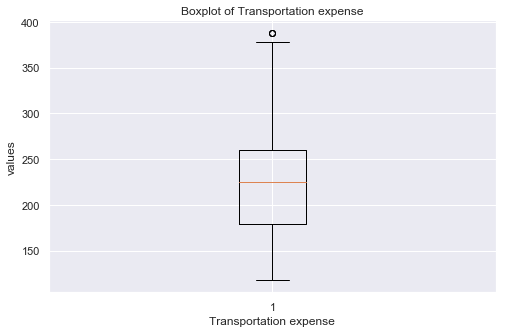

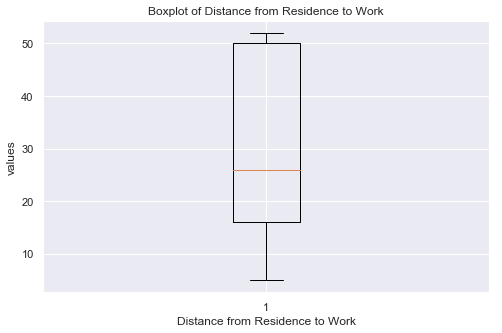

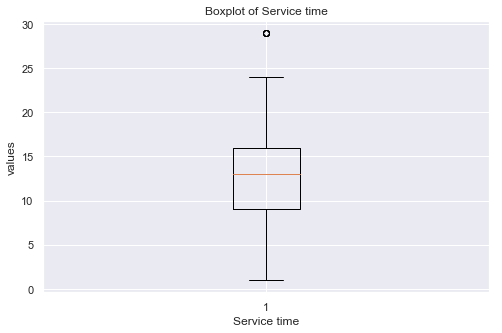

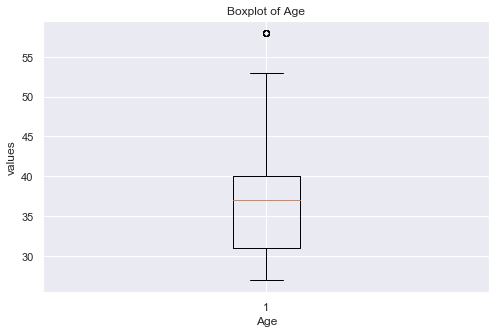

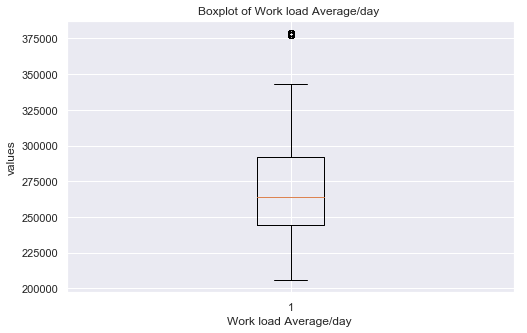

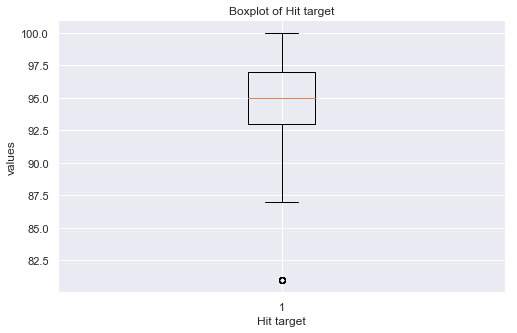

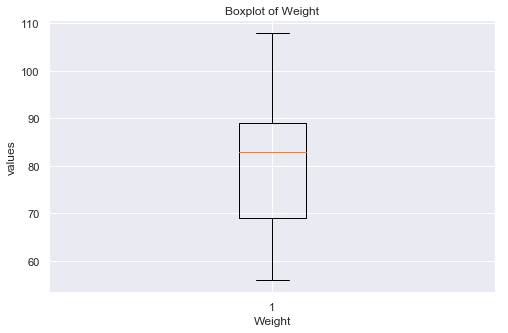

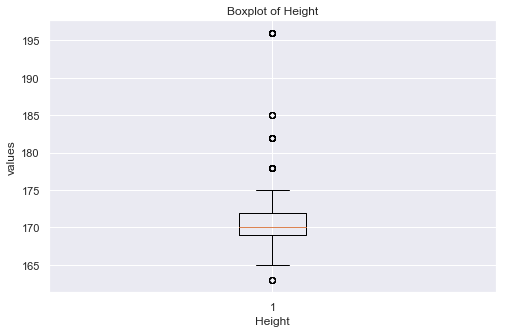

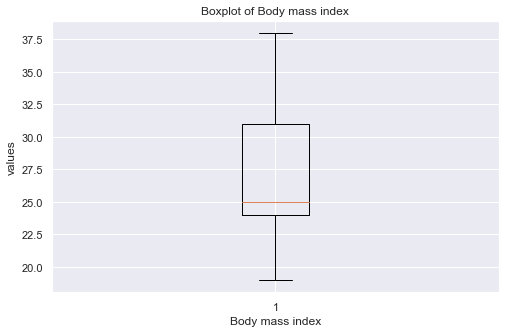

In [29]:
for name in cont_vars:
    if name in ['Absenteeism time in hours']: 
        continue
    plt.figure(figsize=(8,5))
    plt.boxplot(dataset[name])
    plt.xlabel(name)
    plt.ylabel("values")
    plt.title("Boxplot of "+ str(name))
    plt.show()

In [30]:
# list of continuous variables not having any outliers
ignore=['Distance from Residence to Work','Weight','Body mass index']

In [31]:
#detect and replace the outlier from the data with NaN
def remove_outliers(dataset,cont_names,ignore): 
    for i in cont_names:
        if i in ignore:
            continue
        q75,q25=np.percentile(dataset[i],[75,25])
        iqr=q75-q25 #inter quartile range
        minimum=q25-(iqr*1.5)
        maximum=q75+(iqr*1.5)
        # Replacing all the outliers value to NA
        dataset.loc[dataset[i]< minimum,i] = np.nan
        dataset.loc[dataset[i]> maximum,i] = np.nan
    
    return print("Outliers Removed")

In [32]:
remove_outliers(dataset,cont_vars,ignore)

Outliers Removed


In [33]:
#imputing outliers
dataset = pd.DataFrame(KNN(k = 3).fit_transform(dataset), columns = dataset.columns)
#checking missing values
dataset.isna().sum()

Imputing row 1/718 with 0 missing, elapsed time: 0.491
Imputing row 101/718 with 1 missing, elapsed time: 0.497
Imputing row 201/718 with 0 missing, elapsed time: 0.501
Imputing row 301/718 with 1 missing, elapsed time: 0.507
Imputing row 401/718 with 0 missing, elapsed time: 0.513
Imputing row 501/718 with 1 missing, elapsed time: 0.517
Imputing row 601/718 with 2 missing, elapsed time: 0.523
Imputing row 701/718 with 3 missing, elapsed time: 0.527


ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

# Feature Selection


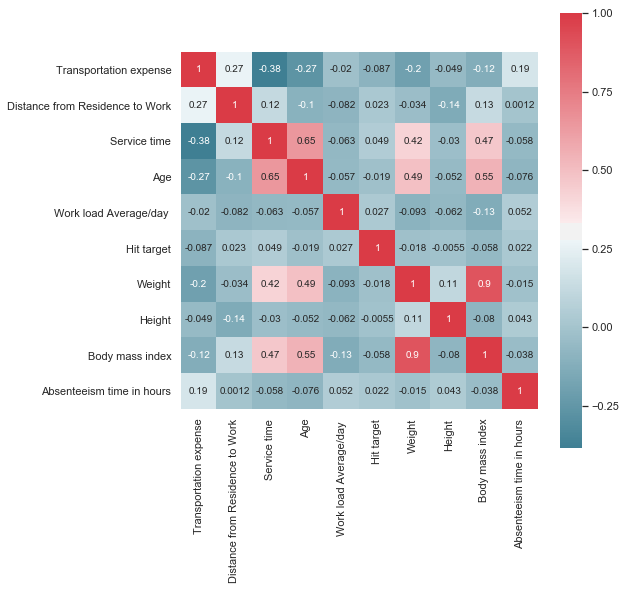

In [34]:
# a) Continuous variables
df_corr=dataset.loc[:,cont_vars]
#Generate correlation matrix
corr = df_corr.corr()
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(8, 8))
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
plt.savefig("correlation_plot.png")

In [35]:
# b) Categorical variables (Use of ANOVA test as target variable is continuous in nature 
for i in cat_vars:
    f, p = stats.f_oneway(dataset[i], dataset[target_var])
    print("P value for the variable '"+str(i)+"' is "+str(p))

P value for the variable 'ID' is 8.555509597741391e-167
P value for the variable 'Reason for absence' is 8.31139463410621e-277
P value for the variable 'Month of absence' is 3.366778837179542e-25
P value for the variable 'Day of the week' is 0.00081136018587244
P value for the variable 'Seasons' is 3.0148965865607056e-40
P value for the variable 'Disciplinary failure' is 1.1304300984504218e-185
P value for the variable 'Education' is 7.888554448592472e-105
P value for the variable 'Son' is 9.025449336314991e-116
P value for the variable 'Social drinker' is 1.2890876287853576e-150
P value for the variable 'Social smoker' is 8.458524899605528e-184
P value for the variable 'Pet' is 5.012588909770493e-127


In [36]:
#list of columns to be removed
to_be_removed=['Body mass index'] # as "Body mass index" column had max number of missing values it's better to remove this column than "Weight"
cont_vars=cont_vars.drop(to_be_removed)
cont_vars

Index(['Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Weight',
       'Height', 'Absenteeism time in hours'],
      dtype='object')

In [37]:
#removing unnecessary features
dataset=dataset.drop(to_be_removed, axis = 1)

In [38]:
cleaned_data=dataset.copy()
cleaned_data.to_csv("cleaned_data.csv", index=False)

# Feature Scaling

In [39]:
# Normalization
for i in cont_vars:
    if i == target_var:
        continue    
    print(i)
    dataset[i] = (dataset[i] - min(dataset[i]))/(max(dataset[i]) - min(dataset[i]))

Transportation expense
Distance from Residence to Work
Service time
Age
Work load Average/day 
Hit target
Weight
Height


In [40]:
# Dummification
for i in cat_vars:
    temp=pd.get_dummies(dataset[i],prefix=i)
    dataset=dataset.join(temp)
print(dataset.shape)

(718, 127)


<h1 align= center>Interactive Data Visualization using plotly </h1>

In [41]:
# import required libraries
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For Notebooks setup
cf.go_offline(connected=True)
init_notebook_mode(connected=True)
# Histogram plot of 
cleaned_data.iplot(kind='hist',y=target_var,bins=100)

<h1 align= center>Model Developement</h1>

## 1)Splitting Dataset

In [42]:
from sklearn.model_selection import train_test_split
X=dataset.loc[:, dataset.columns != target_var]
y= dataset.loc[:, target_var]
X_train, X_test, y_train, y_test =  train_test_split( X, y, test_size = 0.2)

## 2) Error Metrics

In [43]:
# Model Evaluation
#import the required library and module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# define a function to get error metrics
def get_error_metric(original,predicted):
    MSE=mean_squared_error(original,predicted)
    # root mean squred error
    RMSE=np.sqrt(MSE)
    #mean absolute error
    MAE=mean_absolute_error(original,predicted)
    # R square value
    r2=r2_score(original,predicted)
    results={'MSE':MSE,'RMSE':RMSE,'MAE':MAE,'R^2 score':r2}
    return results


# 3) Linear Regression

In [44]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression
# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)
# model fitting on train data
pred_train = fit_LR.predict(X_train)
# mdoel fitting on test data
pred_test = fit_LR.predict(X_test)
# check error metrics
print("Error Metrics for train data")
print(get_error_metric(y_train,pred_train))
print("Error Metrics for test data")
print(get_error_metric(y_test,pred_test))

Error Metrics for train data
{'MSE': 5.827216151464618, 'RMSE': 2.413962748566062, 'MAE': 1.567197289862287, 'R^2 score': 0.5182333769844978}
Error Metrics for test data
{'MSE': 4.699605737073599e+23, 'RMSE': 685536704857.8507, 'MAE': 79098769230.4888, 'R^2 score': -5.013869800522391e+22}


# 4) Decision Tree

In [45]:
# Importing libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor
# Building model on training dataset
fit_DT = DecisionTreeRegressor(max_depth =2).fit(X_train,y_train)
# model fitting on train data
pred_train = fit_DT.predict(X_train)
# model fitting on test data
pred_test = fit_LR.predict(X_test)
# check error metrics
print("Error Metrics for train data")
print(get_error_metric(y_train,pred_train))
print("Error Metrics for test data")
print(get_error_metric(y_test,pred_test))

Error Metrics for train data
{'MSE': 7.517534084831246, 'RMSE': 2.7418121899268093, 'MAE': 1.8483076619443926, 'R^2 score': 0.3784858987009083}
Error Metrics for test data
{'MSE': 4.699605737073599e+23, 'RMSE': 685536704857.8507, 'MAE': 79098769230.4888, 'R^2 score': -5.013869800522391e+22}


# 5) Random Forest

In [46]:
# Importing libraries for Decision Tree 
from sklearn.ensemble import RandomForestRegressor
# Building model on training dataset
fit_RF = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)
# model fitting on train data
pred_train = fit_RF.predict(X_train)
# model fitting on test data
pred_test = fit_RF.predict(X_test)
# check error metrics
print("Error Metrics for train data")
print(get_error_metric(y_train,pred_train))
print("Error Metrics for test data")
print(get_error_metric(y_test,pred_test))

Error Metrics for train data
{'MSE': 1.199317748543834, 'RMSE': 1.095133666975787, 'MAE': 0.6820445482332731, 'R^2 score': 0.9008460907197864}
Error Metrics for test data
{'MSE': 5.732910636938636, 'RMSE': 2.3943497315427074, 'MAE': 1.6906427881083395, 'R^2 score': 0.3883727887025077}
